# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# print(cities)
        
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [77]:
# Set the API base URL for weather
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | firuzabad
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | new plymouth
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | bhamo
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | arucas
Processing Record 9 of Set 1 | hettange-grande
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | yuzhno-kurilsk
Processing Record 12 of Set 1 | uturoa
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | qinhuangdao
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | pacasmayo
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | kasongo

Processing Record 42 of Set 4 | mumbwa
Processing Record 43 of Set 4 | crateus
Processing Record 44 of Set 4 | alofi
Processing Record 45 of Set 4 | vadso
Processing Record 46 of Set 4 | whistler
Processing Record 47 of Set 4 | hamilton
Processing Record 48 of Set 4 | hammerfest
Processing Record 49 of Set 4 | suances
Processing Record 0 of Set 5 | morondava
Processing Record 1 of Set 5 | puerto escondido
Processing Record 2 of Set 5 | okhotsk
Processing Record 3 of Set 5 | kanniyakumari
Processing Record 4 of Set 5 | kralendijk
Processing Record 5 of Set 5 | petauke
Processing Record 6 of Set 5 | gargalianoi
Processing Record 7 of Set 5 | petropavlovsk-kamchatsky
Processing Record 8 of Set 5 | kaduy
Processing Record 9 of Set 5 | iquique
Processing Record 10 of Set 5 | carnarvon
Processing Record 11 of Set 5 | klyuchi
Processing Record 12 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 13 of Set 5 | laguna
Processing Record 14 of Set 5 | bafoulabe
Processing Record 

Processing Record 35 of Set 8 | east london
Processing Record 36 of Set 8 | steamboat springs
Processing Record 37 of Set 8 | luganville
Processing Record 38 of Set 8 | qamdo
Processing Record 39 of Set 8 | paragominas
Processing Record 40 of Set 8 | kavieng
Processing Record 41 of Set 8 | nova vicosa
Processing Record 42 of Set 8 | ormara
Processing Record 43 of Set 8 | chibougamau
Processing Record 44 of Set 8 | ban phe
City not found. Skipping...
Processing Record 45 of Set 8 | lucapa
Processing Record 46 of Set 8 | luderitz
Processing Record 47 of Set 8 | medina
Processing Record 48 of Set 8 | andergrove
Processing Record 49 of Set 8 | superior
Processing Record 0 of Set 9 | kruisfontein
Processing Record 1 of Set 9 | coquimbo
Processing Record 2 of Set 9 | retreat
Processing Record 3 of Set 9 | gamay
Processing Record 4 of Set 9 | amahai
Processing Record 5 of Set 9 | baymak
Processing Record 6 of Set 9 | devinuwara
City not found. Skipping...
Processing Record 7 of Set 9 | spring

Processing Record 20 of Set 12 | santa terezinha
Processing Record 21 of Set 12 | santiago de cao
Processing Record 22 of Set 12 | weyburn
Processing Record 23 of Set 12 | sinaloa de leyva
Processing Record 24 of Set 12 | fraserburgh
Processing Record 25 of Set 12 | prado
Processing Record 26 of Set 12 | hatillo
Processing Record 27 of Set 12 | massawa
Processing Record 28 of Set 12 | roccella ionica
Processing Record 29 of Set 12 | xam nua
Processing Record 30 of Set 12 | bonthe
-----------------------------
Data Retrieval Complete      
-----------------------------


In [78]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [79]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,-1.46,90,8,1.50,CL,1690147429
1,firuzabad,28.8438,52.5707,29.37,18,100,0.76,IR,1690147429
2,adamstown,-25.0660,-130.1015,20.37,71,2,8.00,PN,1690147367
3,new plymouth,-39.0667,174.0833,13.23,91,100,1.71,NZ,1690147292
4,invercargill,-46.4000,168.3500,8.02,95,98,1.00,NZ,1690147364


In [80]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [63]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-1.46,90,8,1.50,CL,1690145025
1,firuzabad,28.8438,52.5707,29.37,18,100,0.76,IR,1690145100
2,adamstown,-25.0660,-130.1015,20.37,71,2,8.00,PN,1690145100
3,new plymouth,-39.0667,174.0833,12.12,90,100,1.71,NZ,1690145100
4,invercargill,-46.4000,168.3500,8.02,95,98,1.00,NZ,1690145100


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

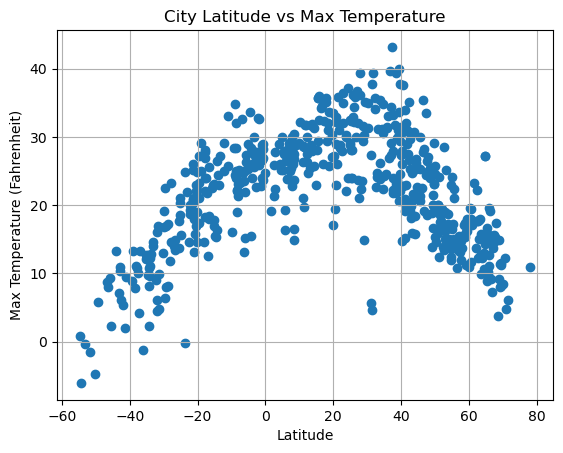

In [81]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

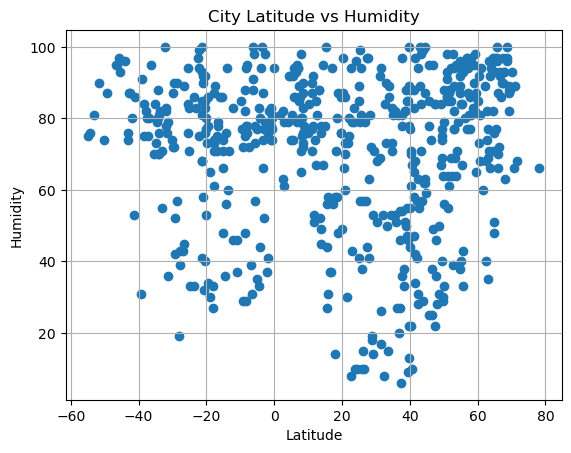

In [82]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

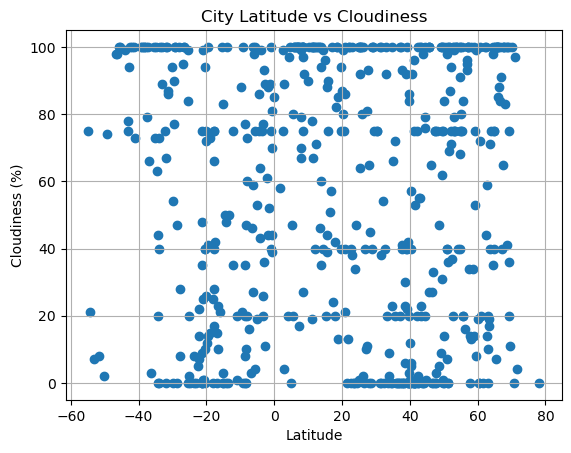

In [83]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

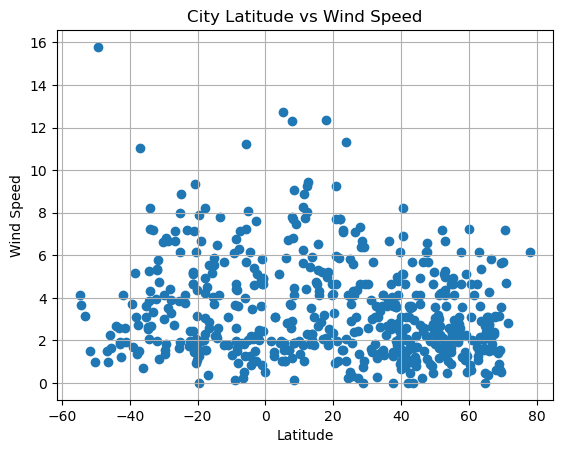

In [84]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [85]:
# Define a function to create linear regression plots
def linear_regression(x_values, y_values, xy_coords, y_label, title):
    #Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    y_regress_values = x_values * slope + intercept
    line_eq = 'y = ' + \
              str(round(slope, 2)) + \
              'x + ' + \
              str(round(intercept, 2))
    
    #Print rvalue
    print(f'The r-value is: {rvalue**2}')
    
    #Render visualization
    plt.figure()
    plt.scatter(x_values, 
                y_values)
    plt.plot(x_values, 
             y_regress_values, 
             'r-')
    plt.annotate(line_eq, 
                 xy_coords, 
                 fontsize = 12, 
                 color = 'red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [86]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,firuzabad,28.8438,52.5707,29.37,18,100,0.76,IR,1690147429
5,bhamo,24.2667,97.2333,24.05,96,47,0.25,MM,1690147429
6,tiksi,71.6872,128.8694,6.15,68,4,2.83,RU,1690147392
7,arucas,28.1198,-15.5233,22.43,81,45,6.41,ES,1690147429
8,hettange-grande,49.4064,6.1506,21.51,69,100,0.45,FR,1690147430


In [87]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,-1.46,90,8,1.50,CL,1690147429
2,adamstown,-25.0660,-130.1015,20.37,71,2,8.00,PN,1690147367
3,new plymouth,-39.0667,174.0833,13.23,91,100,1.71,NZ,1690147292
4,invercargill,-46.4000,168.3500,8.02,95,98,1.00,NZ,1690147364
9,edinburgh of the seven seas,-37.0676,-12.3116,13.34,80,66,11.06,SH,1690147430


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3991662741418262


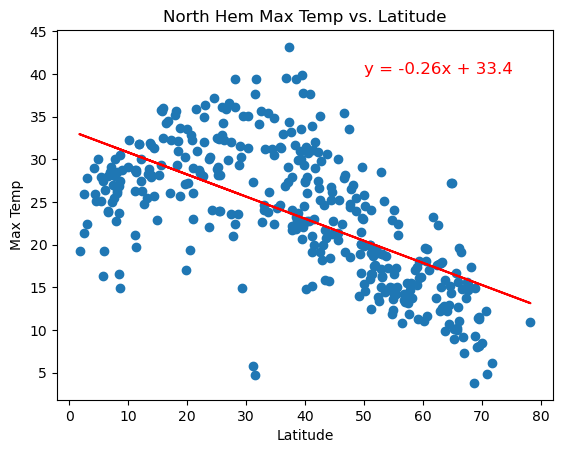

In [89]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression(x_values, y_values, (50, 40), 'Max Temp','North Hem Max Temp vs. Latitude')

The r-value is: 0.6950855635267832


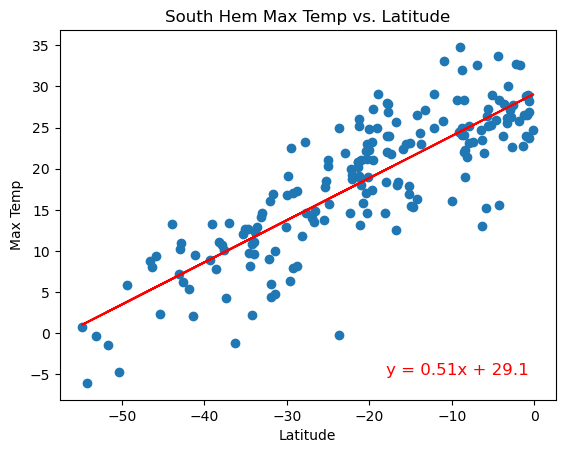

In [107]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression(x_values, y_values, (-18, -5), 'Max Temp','South Hem Max Temp vs. Latitude')

**Discussion about the linear relationship:** It shows stronger linear relation between latitude and max temperature from south hemisphere weather pattern compared to northern hemisphere based on r values.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.012027531550980372


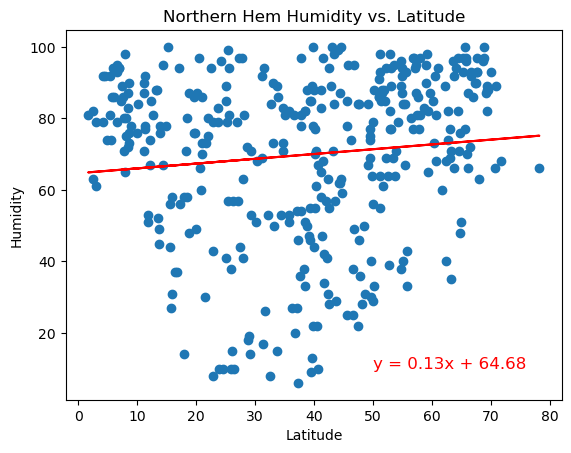

In [100]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression(x_values, y_values, (50, 10), 'Humidity' , 'Northern Hem Humidity vs. Latitude')

The r-value is: 0.018094340888526895


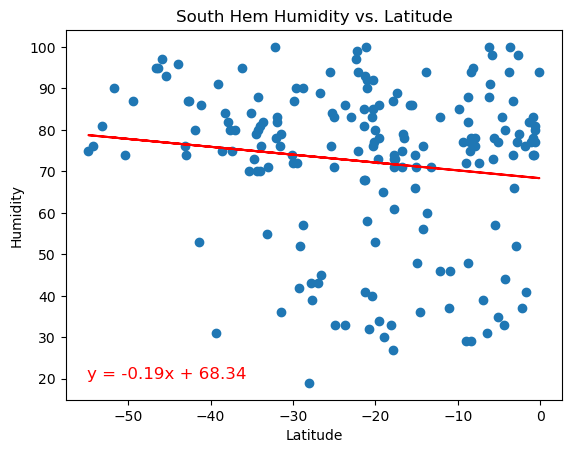

In [117]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression(x_values, y_values, (-55, 20), 'Humidity','South Hem Humidity vs. Latitude')

**Discussion about the linear relationship:** humidity does not correlate well with latitudes on both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00985981632319916


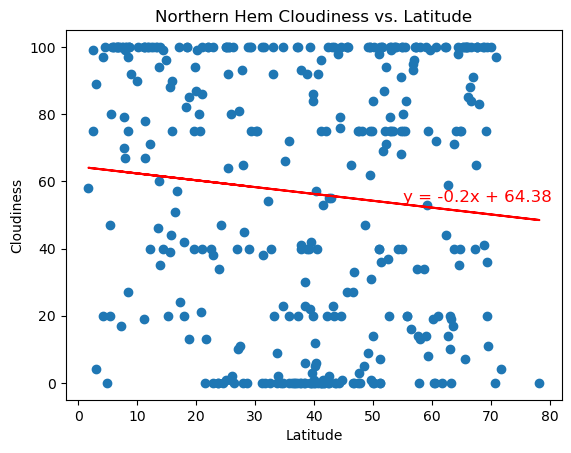

In [124]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, (55, 54), 'Cloudiness' , 'Northern Hem Cloudiness vs. Latitude')

The r-value is: 0.030539610465516925


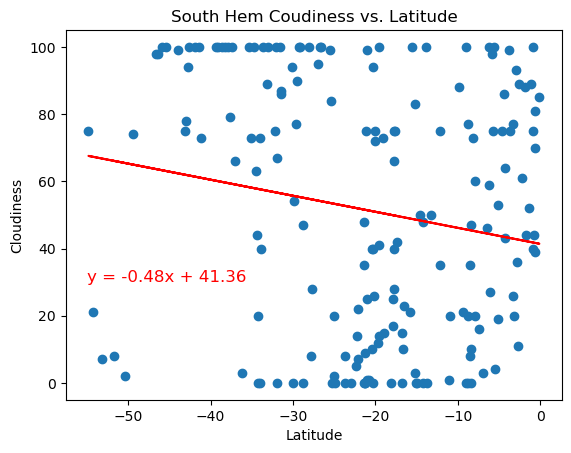

In [116]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, (-55, 30), 'Cloudiness','South Hem Cloudiness vs. Latitude')

**Discussion about the linear relationship:** Cloudiness does not show strong correlation with latitudes on both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05306517036977619


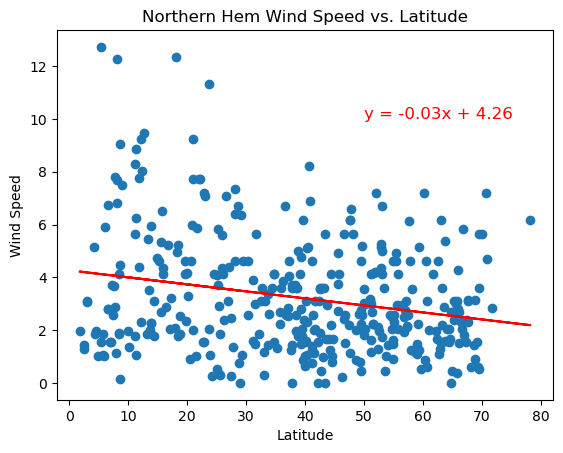

In [120]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, (50, 10), 'Wind Speed' , 'Northern Hem Wind Speed vs. Latitude')

The r-value is: 8.470069371027863e-05


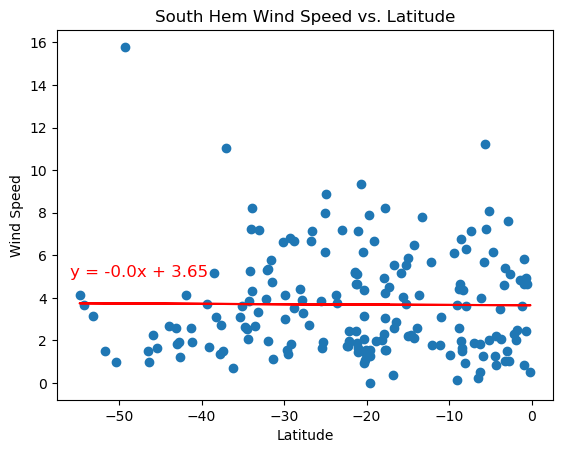

In [133]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, (-56,5), 'Wind Speed','South Hem Wind Speed vs. Latitude')

**Discussion about the linear relationship:** Wind speed does not show strong correlation with latitudes on both hemispheres.